## (1) Data Description: ##

The players.csv dataset includes a list of all unique players on the MineCraft server and contains data about each player. There are 196 observations and 7 variables in the players.csv dataset.

### Summary statistics and descriptions of each variable ###

` experience` = The user's experience level
- character variable
- separated into categories  
  
<br>


` subscribe` = Wether the user is subscribed to the game-related newsletter
- logical variable
- Subscribed = TRUE
- Not subscribed = FALSE
  
<br>

` hashedEmail` = The user's email
- character variable
- displays the each user's email adress

<br>

` played_hours` = The user's total played hours
- Numeric variable
- Measured in hours (hrs)
- Minimum: 0.000
- 1st Quartile: 0.000
- Median: 0.100
- Mean: 5.846
- 3rd Quartile: 0.600
- Maximum: 223.100
  
<br>


` name` = The user's name
- character variable
  
<br>

` gender` = The user's gender
- character variable

<br>

` Age` = The user's age
- Numeric variable
- Measured in years (yrs)
- Minimum: 8
- 1st Quartile: 17
- Median: 19
- Mean: 20.52
- 3rd Quartile: 22
- Maximum: 50
- NA's: 2

<br>

One issue in the data is that there are 2 NA's within the age column. A potential issue could be that many users chose "prefer not to say" in the gender column which essentially represent NA's, and this may make it difficult to include in interpretations. 


## (2) Questions: ##  

#### Broad question ####
What type's of players are most likely to contribute a large amount of data so that recruiting efforts can be targeted towards those groups.

#### Specific question ####
Can a users age and gender predict their playing time on MineCraft in the players.csv dataset?

The data includes all or almost all of the user's data, which includes their age, gender, and the total number of hours they played on MineCraft. Using age and gender we can see if there is any trend or relation to how many hours they have played. Only the 3 variables of interest will be selected, and any character variables will be converted into a categorical variable.

## (3) Exploratory Data Analysis and Visualization ##

In [16]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

In [17]:
url <- "https://raw.githubusercontent.com/Shaneoman/Project-Planning-Stage-Individual-/refs/heads/main/players.csv"
players.csv <- "players.csv"
download.file(url, players.csv, mode = "wb")
data <- read_csv(players.csv)
head(data)
summary(data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

### Wrangled Data ###

In [18]:
data_select <- data |>
    select(gender, Age, played_hours)|>
    mutate(gender = as_factor(gender))
data_select

gender,Age,played_hours
<fct>,<dbl>,<dbl>
Male,9,30.3
Male,17,3.8
Male,17,0.0
⋮,⋮,⋮
Prefer not to say,17,0.0
Male,17,2.3
Other,NA,0.2


### Mean Values ###

In [19]:
data_mean <- data |>
    summarize(mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours, na.rm = TRUE))
data_mean

mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


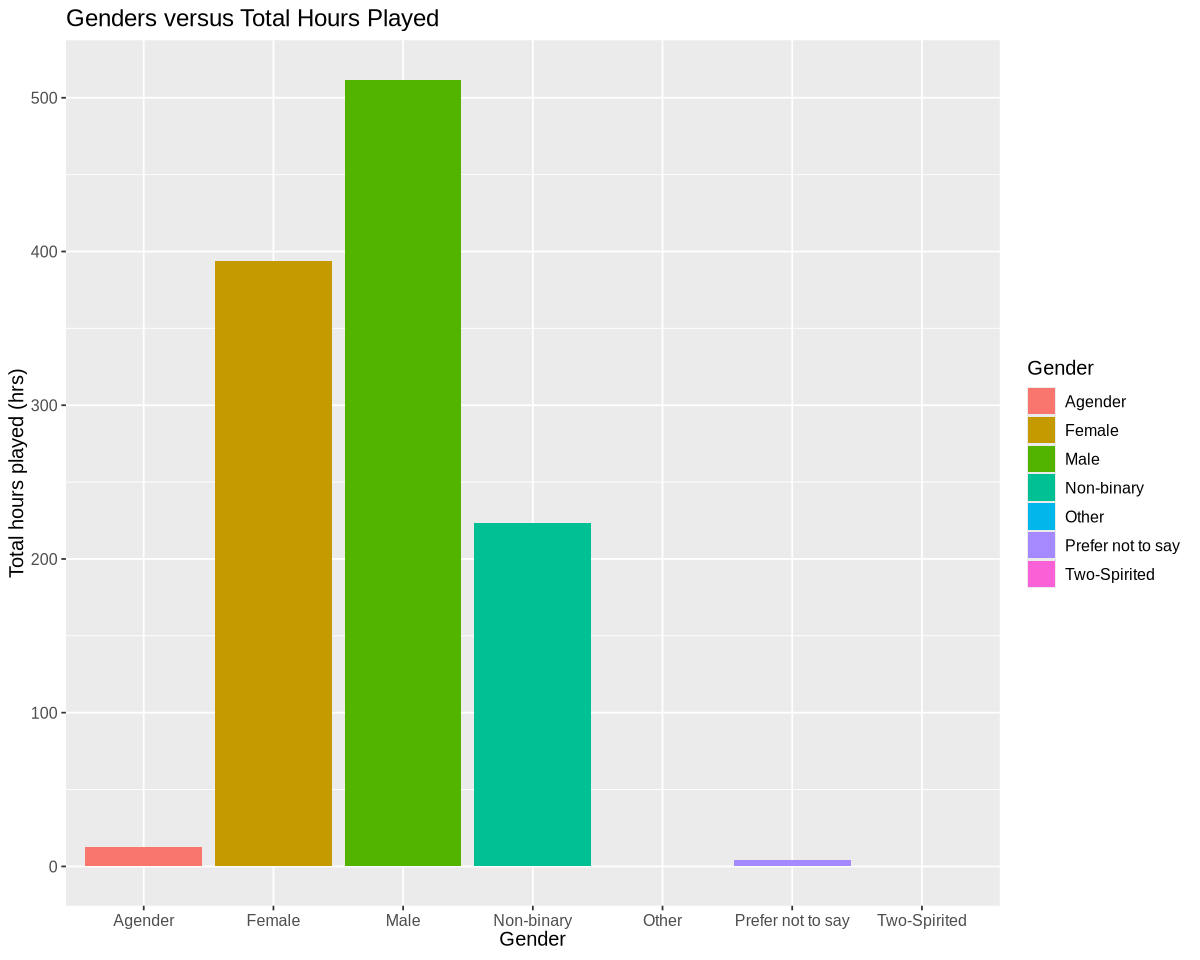

In [20]:
options(repr.plot.width = 10, repr.plot.height = 8)

data_plot <- ggplot(data, aes(x = gender,y = played_hours,fill=gender)) +
  geom_bar(stat="identity") +
  labs(x="Gender", y="Total hours played (hrs)", title="Genders versus Total Hours Played", fill="Gender") +
  theme(text = element_text(size = 12))

data_plot

This bar plot shows that certain genders spend more time on the server, male being the highest .

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


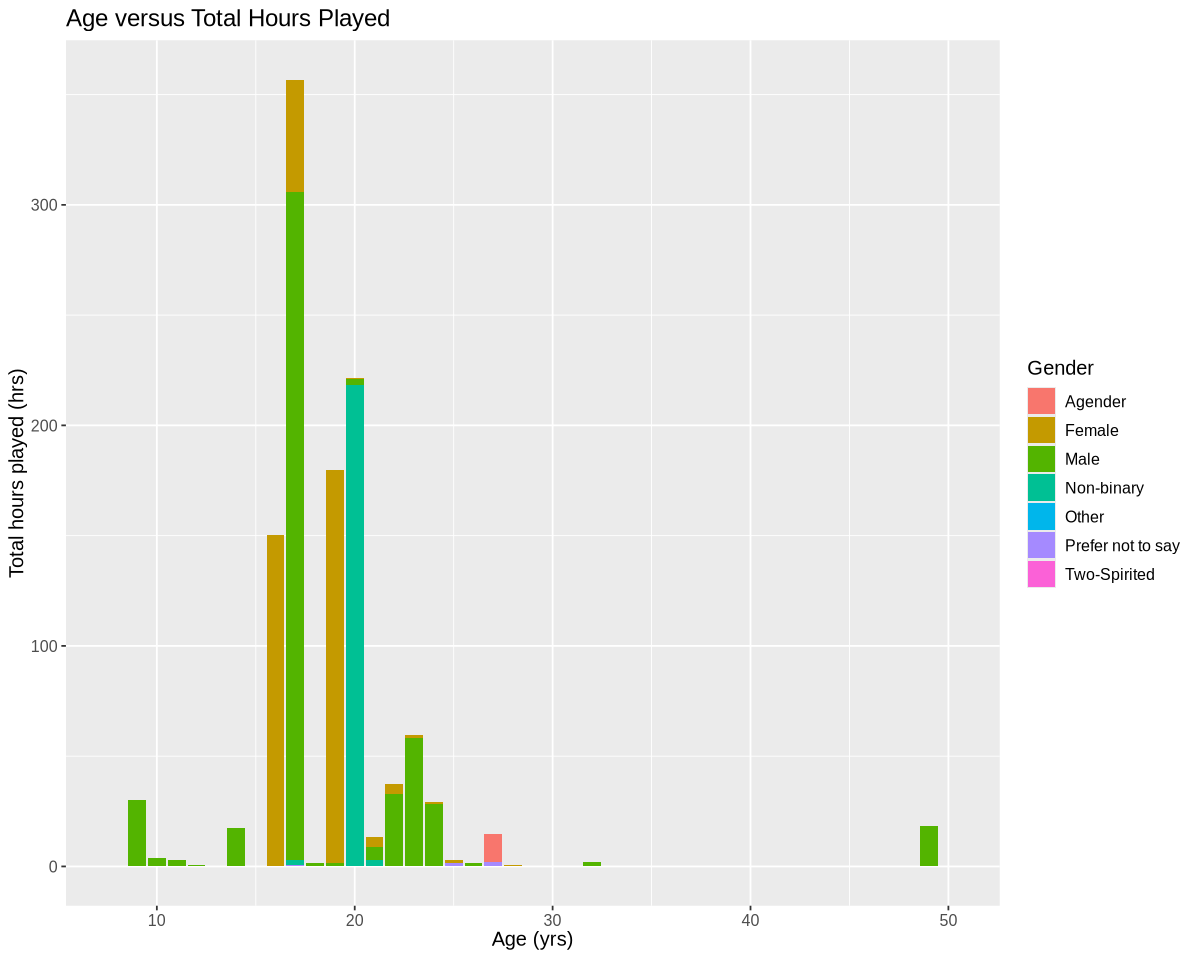

In [21]:
options(repr.plot.width = 10, repr.plot.height = 8)

data_plot <- ggplot(data, aes(x = Age,y = played_hours,fill=gender)) +
  geom_bar(stat="identity") +
  labs(x="Age (yrs)", y="Total hours played (hrs)", title="Age versus Total Hours Played", fill="Gender") +
  theme(text = element_text(size = 12))

data_plot

This bar plot shows there is no clear linear trend in the data, but there are certain ages such as 17 and 20 being the highest in play time.

## (4) Methods and Plan ##

I propose K-nearest neighbors regression to address if age and gender can predict playing time. This model suits the data well because there does not appear to be any linear trends within the data, and we are predicting a numerical value, therefore KNN regression fits these parameters the best.

KNN regression relies on the distance between points, and therefore assumes that the variables in the dataset are appropriately scaled, so that one variable does not have a disproportionate effect on the prediction. 

KNN regression is more sensitive to outliers in the data and they can have a significant impact depending on the K value chosen. It also relies on chosing a strong K value, as chosing too small or too big can lead to overffiting and underfitting.

Cross validation can be used to help find the optimal K value to use with the data, and the performance metrics such as root mean squarred error (RMSE) can be used to compare the strengh of the model.

To process the data it will then be split into a training and testing set before applying any processing steps, with 75% of the data in the training set and 25% in the testing set. The data it will then be standardized so that the variables affect the prediction equally, and missing values will be removed as there are only 2 values missing from the Age variable. Next, the model will be trained with the training set, cross validation with 5 folds will be used to find the optimal K for the model. The model will then be evaluated using the testing set  and its performance will be evaluated using the regression metrics such as RMSE. 